In [1]:
# get_ipython().magic(u'config IPCompleter.greedy=True')

In [3]:
import requests
import json
import pandas as pd
from datetime import date, timedelta
from adh_sample_library_preview import *

numberOfPreviewRows = 5 #this keeps the notebook short throughout the entries when displaying the output at each step

In [30]:
# Try to open the configuration file
try:
    with open(
        'appsettings.json',
        'r',
    ) as f:
        appsettings = json.load(f)
except Exception as error:
    print(f'Error: {str(error)}')
    print(f'Could not open/read appsettings.json')
    exit()

adhClient = ADHClient(appsettings.get('ApiVersion'), appsettings.get('TenantId'), appsettings.get('Resource'), 
                        appsettings.get('ClientId'), appsettings.get('ClientSecret'))

namespaceId = appsettings.get('NamespaceId')
namespaceId

'accfc461-1fa1-43f4-8227-bff8ebaa0d0f'

In [46]:
#dateFrom = '2020-01-12'
#dateTo ='2020-01-23'
dateFrom = 'Mar 11, 2020, 12:00:00 AM' #str(date.today()-timedelta(days=10))
dateTo = 'Mar 12, 2020, 12:00:00 AM'# str(date.today()) #10 days of data
timeinterval = '00:01:00' #interpolate every minute

#dataviewId = Wind Turbine Data_NN, where NN is your specific student number (e.g. NN=01 in this example)
dataviewId= "Wind Turbine Data"

data, n, f = adhClient.DataViews.getDataInterpolated(namespaceId, dataviewId, 150000, start_index=dateFrom, end_index=dateTo, 
                                                         interval=timeinterval)

# output the data (but truncate it after a handful of rows)
data[:numberOfPreviewRows] 



[{'Timestamp': '2020-03-11T00:00:00',
  'Turbine': 'GE01',
  'Blade3 Actual': -0.11147802,
  'Rotor Speed': 15.482932,
  'State': 16,
  'Nacelle Position': 304.809,
  'Active Power': 393.81445,
  'Air Temperature': 57.54779,
  'Wind Speed': 6.9476624,
  'Blade1 Actual': -0.543748,
  'Blade2 Actual': -0.5085606},
 {'Timestamp': '2020-03-11T00:01:00',
  'Turbine': 'GE01',
  'Blade3 Actual': -0.0988387,
  'Rotor Speed': 14.812955,
  'State': 16,
  'Nacelle Position': 304.6422,
  'Active Power': 405.43518,
  'Air Temperature': 57.531895,
  'Wind Speed': 6.6366854,
  'Blade1 Actual': -0.54135567,
  'Blade2 Actual': -0.5062879},
 {'Timestamp': '2020-03-11T00:02:00',
  'Turbine': 'GE01',
  'Blade3 Actual': -0.08619938,
  'Rotor Speed': 13.750278,
  'State': 16,
  'Nacelle Position': 304.4754,
  'Active Power': 307.92307,
  'Air Temperature': 57.516,
  'Wind Speed': 6.979335,
  'Blade1 Actual': -0.5389633,
  'Blade2 Actual': -0.50401515},
 {'Timestamp': '2020-03-11T00:03:00',
  'Turbine': 'GE0

In [47]:
df = pd.DataFrame(data)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

df[:numberOfPreviewRows]


,Timestamp,Turbine,Blade3 Actual,Rotor Speed,State,Nacelle Position,Active Power,Air Temperature,Wind Speed,Blade1 Actual,Blade2 Actual
0,2020-03-11 00:00:00,GE01,-0.111478,15.482932,16,304.80900,393.81445,57.547790,6.947662,-0.543748,-0.508561
1,2020-03-11 00:01:00,GE01,-0.098839,14.812955,16,304.64220,405.43518,57.531895,6.636685,-0.541356,-0.506288
2,2020-03-11 00:02:00,GE01,-0.086199,13.750278,16,304.47540,307.92307,57.516000,6.979335,-0.538963,-0.504015
3,2020-03-11 00:03:00,GE01,-0.073560,17.696032,16,304.30860,618.70000,57.500107,7.525977,-0.536571,-0.501742
4,2020-03-11 00:04:00,GE01,-0.060921,17.967062,16,304.21494,641.00000,57.484210,8.931692,-0.534179,-0.499470


In [48]:
import matplotlib.pyplot as plt
import numpy as np

In [49]:
#Renaming DataFrame column names to abbreviations, in order to display these column names clearly in a correlation plot 

df.rename(columns = {'Blade1 Actual':'BL1', 'Blade2 Actual':'BL2', 
                     'Blade3 Actual':'BL3', 'Rotor Speed':'RS','Turbine':'TS', 
                     'Active Power':'AP', 'Nacelle Position':'NP', 'Air Temperature':'AT',
                     'Wind Speed':'WS'}, inplace = True)

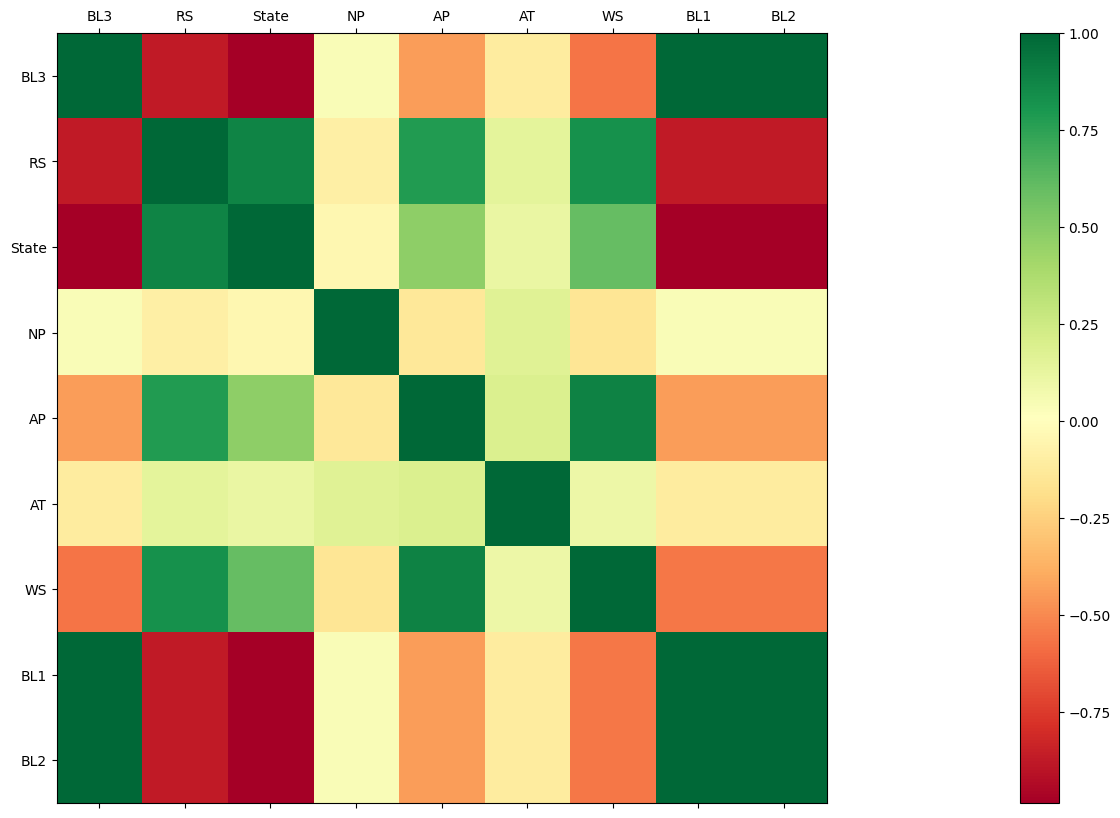

In [50]:
#Check the correlation between Active Power and the rest of the variables

#retrieve the correlation table
df_corr = df.corr(numeric_only = True)

#increase the size of the figure
fig = plt.figure(figsize=(50,10))
ax = fig.add_subplot(111)

#set the color pallete (Red, yellow, green)
cax = ax.matshow(df_corr, cmap=plt.cm.RdYlGn)
fig.colorbar(cax)

#configure the labels
labels = [c for c in df_corr.columns]

#make sure to show all the labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

#Setting labels for the x and y axes of the correlation plot
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show(block=False)

In [51]:
#Renaming DataFrame column names from abbreviations back to their original full names

df.rename(columns = {'BL1':'Blade1', 'BL2':'Blade2', 
                     'BL3':'Blade3', 'RS':'Rotor Speed Value','TS':'Turbine', 
                     'AP':'Active Power Value','NP':'Nacelle Position Value', 'AT':'Air Temperature Value',
                     'WS':'Wind Speed Value'}, inplace = True)

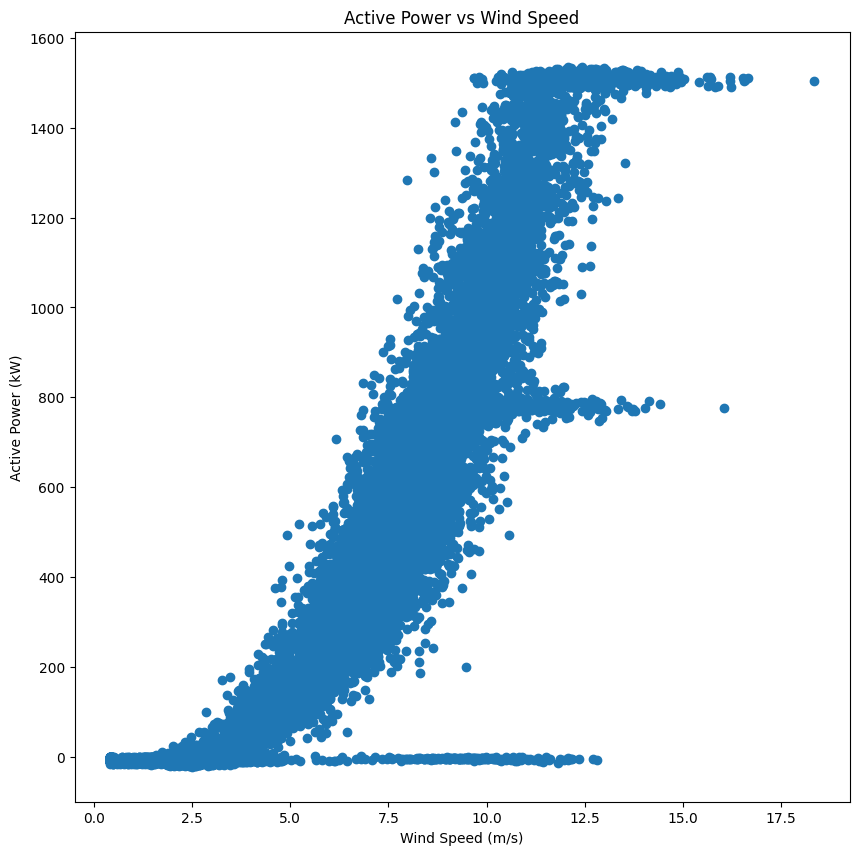

In [52]:
#Plotting Active Power versus Wind Speed

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df['Wind Speed Value'], df['Active Power Value'])
ax.set_xlabel('Wind Speed (m/s)')
ax.set_ylabel('Active Power (kW)')
ax.set_title('Active Power vs Wind Speed')

plt.show(block=False)

In [53]:

# df = df.dropna() #not needed
#Remove the GE05 turbine rows from the data frame because it has a lower rating relative to all the other turbines
filterOutGE05 = df['Turbine'] != "GE05"
df_Filter = df[filterOutGE05]

In [54]:
#Filter out negative & excessive Active Power Values
filterNegativeActivePower = (df_Filter['Active Power Value'] >= 0) 
df_Filter = df_Filter[filterNegativeActivePower]

In [55]:
#Remove the rows where we have a high wind speed and low active power in order to keep only the normal operating conditions
filterOutLowPowerHighWindSpeedData = (~((df_Filter['Wind Speed Value'] >  10) & (df_Filter['Active Power Value'] <600)))
df_Filter = df_Filter[filterOutLowPowerHighWindSpeedData]

In [56]:
#Keep only the rows which correspond to the "Load Operation" state
filterLoadOperationState = df_Filter['State'] == 16
df_Filter = df_Filter[filterLoadOperationState]

In [57]:
#Filter out high Wind Speeds (> 13 m/s) that do not change the Active Power results
filterOutHighWind = df_Filter['Wind Speed Value'] <13
df_Filter = df_Filter[filterOutHighWind]

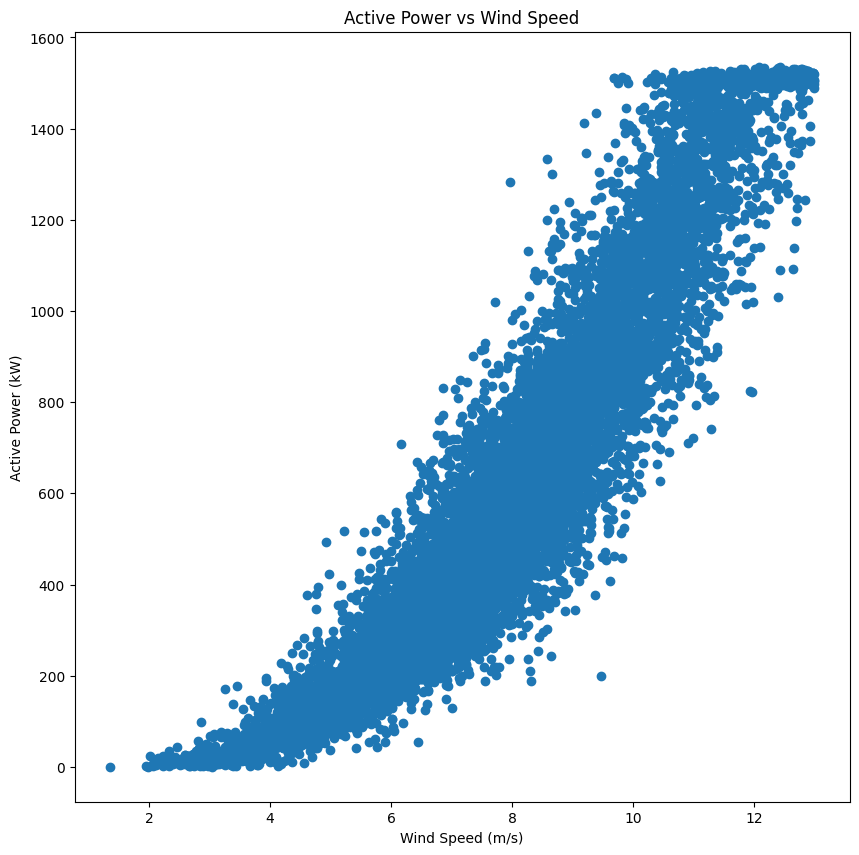

In [58]:
#Plotting Active Power versus Wind Speed - filtered data frame representing Normal Operating Conditions

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(df_Filter['Wind Speed Value'], df_Filter['Active Power Value'])
ax.set_xlabel('Wind Speed (m/s)')
ax.set_ylabel('Active Power (kW)')
ax.set_title('Active Power vs Wind Speed')

plt.show(block=False)

In [59]:
#Prepare the training & testing/scoring data sets, and split them randomly
from sklearn.model_selection import train_test_split
#define the target variable to be predicted
y = df_Filter['Active Power Value'].values
#split the dataset randomly into test and train sets
X_train, X_test, y_train, y_test = train_test_split(df_Filter[['Air Temperature Value', 'Wind Speed Value']].values, 
                                                    y, test_size=0.25, random_state=42)

In [60]:
#Use the Decision Tree Regression Machine Learning model from scikit-learn
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

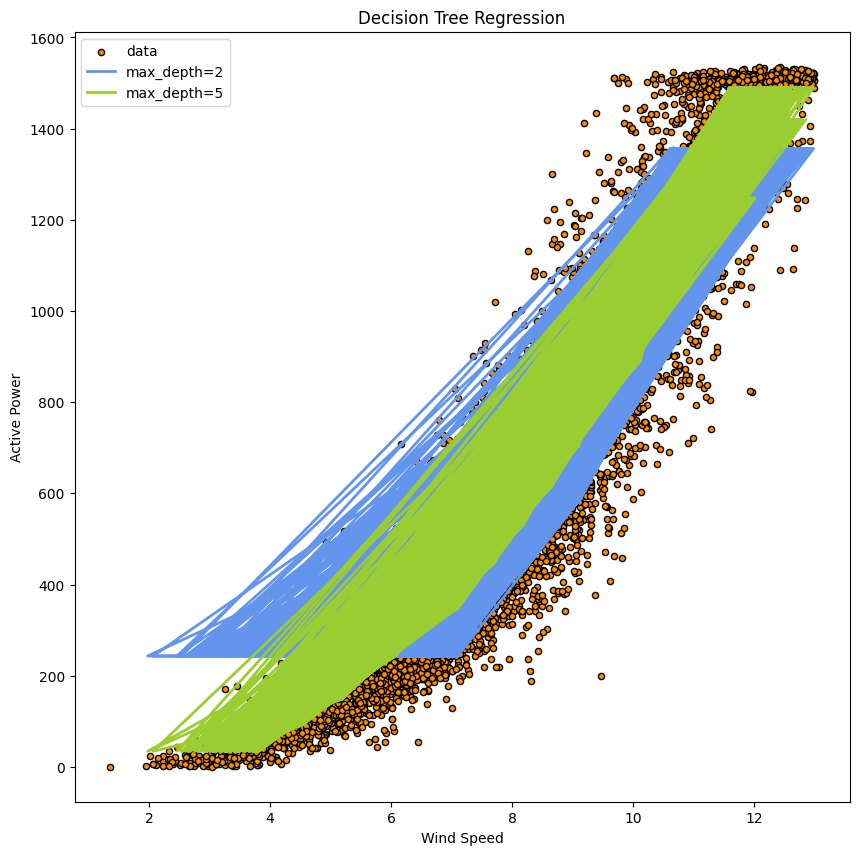

In [61]:
# Plot the results
plt.figure(figsize=(10,10))
plt.scatter(X_train[:,1], y_train, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test[:,1], y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test[:,1], y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Wind Speed")
plt.ylabel("Active Power")
plt.title("Decision Tree Regression")
plt.legend()
plt.show(block=False)

In [62]:
#save the machine learning model to disk
import pickle
filename = 'WT_ActivePower_model.sav'
pickle.dump(regr_2, open(filename, 'wb'))

In [63]:
#Test the model with the scoring/testing data set
loaded_model = pickle.load(open(filename, 'rb'))
global result
result = loaded_model.score(X_test, y_test)
#print the model score
print(result)

0.9087426525813225


In [64]:
#Sample prediction
# define input
new_input = [[45, 6.6]] #Temp=45 F, Wind Speed = 6.6 m/s
# get prediction for new input
new_output = regr_2.predict(new_input)
print(new_output)

[348.57358041]


In [65]:
#Call the OpenWeather API to retrieve the forecasted air temperature and wind speed for Amarillo, TX for the next 5 days
import requests
url="https://api.openweathermap.org/data/2.5/forecast?q=Amarillo,US&APPID=5dac981ce33f41f61d8d1ea06ee89798"
responseWeatherForecast=requests.get(url)

In [66]:
responseWeatherForecast.json()

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1685750400,
   'main': {'temp': 288.46,
    'feels_like': 288.24,
    'temp_min': 288.46,
    'temp_max': 290.1,
    'pressure': 1013,
    'sea_level': 1013,
    'grnd_level': 887,
    'humidity': 84,
    'temp_kf': -1.64},
   'weather': [{'id': 501,
     'main': 'Rain',
     'description': 'moderate rain',
     'icon': '10d'}],
   'clouds': {'all': 98},
   'wind': {'speed': 5.41, 'deg': 197, 'gust': 9.6},
   'visibility': 10000,
   'pop': 0.99,
   'rain': {'3h': 3.05},
   'sys': {'pod': 'd'},
   'dt_txt': '2023-06-03 00:00:00'},
  {'dt': 1685761200,
   'main': {'temp': 287.53,
    'feels_like': 287.3,
    'temp_min': 287.47,
    'temp_max': 287.53,
    'pressure': 1012,
    'sea_level': 1012,
    'grnd_level': 886,
    'humidity': 87,
    'temp_kf': 0.06},
   'weather': [{'id': 500,
     'main': 'Rain',
     'description': 'light rain',
     'icon': '10n'}],
   'clouds': {'all': 100},
   'wind': {'speed': 4.79, 'deg': 128, 'gu

In [67]:
#Store the forecasted air temperature, wind speed and timestamp from the API json response in a pandas DataFrame

from decimal import Decimal
import datetime
TempArray = []
WindSpeedArray = []
TimestampArray = []

for val in responseWeatherForecast.json()["list"]:
    tempKelvin = val["main"]["temp"]
    tempF = round(((tempKelvin - 273.15) * (9/5)) + 32, 2)
    windSpeedMeterPerSec = round(val["wind"]["speed"], 2)
    np.array(TempArray.append(tempF))
    np.array(WindSpeedArray.append(windSpeedMeterPerSec))
    np.array(TimestampArray.append(datetime.datetime.strptime(val["dt_txt"], '%Y-%m-%d %H:%M:%S')))   
          
dfWeatherForecast = pd.DataFrame({'Timestamp':TimestampArray, 'Temp (F)':TempArray, 'Wind Speed (m/s)':WindSpeedArray})        
                              
dfWeatherForecast[:numberOfPreviewRows]

,Timestamp,Temp (F),Wind Speed (m/s)
0,2023-06-03 00:00:00,59.56,5.41
1,2023-06-03 03:00:00,57.88,4.79
2,2023-06-03 06:00:00,56.82,6.03
3,2023-06-03 09:00:00,55.00,4.15
4,2023-06-03 12:00:00,54.43,1.48


In [68]:
#Use the machine learning model developed previously to predict the Active Power and add the values to the existing Data Frame

import pickle
filename = 'WT_ActivePower_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

PredictedPowerArray=[]  

for index, row in dfWeatherForecast.iterrows():
    new_input = [[row['Temp (F)'], row['Wind Speed (m/s)']]]
    result = loaded_model.predict(new_input)
    np.array(PredictedPowerArray.append(result))
    
dfWeatherForecast['Predicted Active Power (kW)']=pd.DataFrame(PredictedPowerArray)

dfWeatherForecast[:numberOfPreviewRows]

,Timestamp,Temp (F),Wind Speed (m/s),Predicted Active Power (kW)
0,2023-06-03 00:00:00,59.56,5.41,198.379212
1,2023-06-03 03:00:00,57.88,4.79,148.488162
2,2023-06-03 06:00:00,56.82,6.03,242.122865
3,2023-06-03 09:00:00,55.00,4.15,92.285506
4,2023-06-03 12:00:00,54.43,1.48,34.123415


In [69]:
#Create the type for air temp, wind speed, predicted active power, and time

typeId = "Wind_Turbine_Predictions_Time"

typeTempWindPowerTime = SdsType(
    typeId,
    SdsTypeCode.Object,
    description="A Time-Series indexed type with 3 values")

#This type uses two data types, double and datetime
doubleType = SdsType("doubleType", SdsTypeCode.Double)
timeType = SdsType("string", SdsTypeCode.DateTime)

#This type has three double properties and one datetime
airTempProp = SdsTypeProperty("Air_Temperature", sds_type=doubleType)
windSpeedProp = SdsTypeProperty("Wind_Speed", sds_type=doubleType)
predActPowerProp = SdsTypeProperty("Predicted_Active_Power", sds_type=doubleType)
timeProp = SdsTypeProperty("Timestamp", True, timeType)

#Add the properties to the type, and commit it to ADH
typeTempWindPowerTime.Properties = [airTempProp, windSpeedProp, predActPowerProp, timeProp]

adhClient.Types.getOrCreateType(namespaceId, typeTempWindPowerTime)


In [70]:
#Create the stream based on the previously created type

streamId = "WT_5dForecast_1"

predPowerStream = SdsStream(
    streamId,
    typeId,
    description="A stream for predicted active power data")

#Commit the stream to ADH
adhClient.Streams.getOrCreateStream(namespaceId, predPowerStream)

In [71]:
#Save data back to prediction stream in ADH

values = []

for index, row in dfWeatherForecast.iterrows():
        values.append({"Air_Temperature": row["Temp (F)"], "Wind_Speed": row["Wind Speed (m/s)"], 
                       "Predicted_Active_Power": row["Predicted Active Power (kW)"], "Timestamp": 
                       row["Timestamp"].strftime('%Y-%m-%d %H:%M:%S') })

adhClient.Streams.updateValues(namespaceId, streamId, json.dumps(values))
global finished
finished = True

In [72]:
def test_result():   
    global result

    assert result is not None
    
def test_finished():   
    global finished
    
    assert finished
